# Анализ бизнес-показателей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span></li><li><span><a href="#Задание-функций-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Задание-функций-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Исходные данные

Продукт - приложение Procrastinate Pro+.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Надо разобраться, в чем причина.

**Дано:**
1. Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года;
2. Лог сервера с данными об их посещениях;
3. Выгрузка их покупок за этот период;
4. Рекламные расходы.

**Найти:**
1. Откуда приходят пользователи и какими устройствами они пользуются;
2. Сколько стоит привлечение пользователей из различных рекламных каналов;
3. Сколько денег приносит каждый клиент;
4. Когда расходы на привлечение клиента окупаются;
5. Какие факторы мешают привлечению клиентов.

## Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# Выгружаем таблицы
try: visits, orders, costs = (
    pd.read_csv('/Users/boris/Documents/Praktikum/Code/Raw data Unit Economy/visits_info_short.csv'),
    pd.read_csv('/Users/boris/Documents/Praktikum/Code/Raw data Unit Economy/orders_info_short.csv'),
    pd.read_csv('/Users/boris/Documents/Praktikum/Code/Raw data Unit Economy/costs_info_short.csv')
)
    
except: visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv')
)

# Знакомимся с данными
print(visits.head())
print()
print(orders.head())
print()
print(costs.head())

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  

        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-0

In [3]:
# Знакомимся с типом данных и проверяем наличие пропусков
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #

In [4]:
# Приводим названия столбцов к нижнему регистру
# Заменяем пробелы подчеркиванием
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')
costs.columns = costs.columns.str.lower()
costs.columns = costs.columns.str.replace(' ', '_')

print(visits.columns)
print(orders.columns)
print(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


In [5]:
# Приводим данные времени к типу datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [6]:
# Оцениваем выполненную работу
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage

In [7]:
# Проверяем явные дубликаты
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

**В ходе знакомства с данными были выполнены следующие доработки:**
1. Названия колонок приведены к нижнему регистру;
1. Пробелы в названии колонок поменял на нижнее подчеркивание;
1. Колонки с датами привел к типу datetime.

## Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

In [8]:
# Функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [9]:
# Проверяем профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [10]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
dimensions = ['region']
#print(last_suitable_acquisition_date)

In [11]:
# Функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
 # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    result_raw = result_raw[result_raw['channel'] != 'organic']
 # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
     # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [12]:
# Проверяем удеражание и динамику
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
print(retention_raw.head())

   user_id            first_ts   channel  device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
2   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
3  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   
4  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   

       month  payer  acquisition_cost       session_start  lifetime  
0 2019-05-01   True          1.088172 2019-05-07 20:58:57         0  
1 2019-05-01   True          1.088172 2019-05-08 06:00:42         0  
2 2019-05-01   True          1.088172 2019-05-09 07:33:16         1  
3 2019-07-01  False          1.107237 2019-07-09 12:46:07         0  
4 2019-07-01  False          1.107237 2019-07-10 22:27:24         1  


In [13]:
print(retention_grouped.head(10))
print(retention_raw['region'].unique())

                     cohort_size    0         1         2         3         4  \
payer region                                                                    
False France                9993  1.0  0.173021  0.091164  0.052036  0.033724   
      Germany               8563  1.0  0.176690  0.084900  0.056172  0.035034   
      UK                   10002  1.0  0.179064  0.088582  0.051390  0.031994   
      United States        52776  1.0  0.177221  0.085626  0.051160  0.033500   
True  France                 523  1.0  0.474187  0.386233  0.323136  0.307839   
      Germany                467  1.0  0.483940  0.402570  0.314775  0.327623   
      UK                     534  1.0  0.483146  0.421348  0.327715  0.299625   
      United States         5786  1.0  0.354822  0.263913  0.212755  0.183719   

                            5         6         7         8         9  \
payer region                                                            
False France         0.022616  0.018213  0.

In [14]:
print(retention_history.head(10))

                         cohort_size    0         1         2         3  \
payer region dt                                                           
False France 2019-05-01           51  1.0  0.137255  0.039216  0.117647   
             2019-05-02           26  1.0  0.230769  0.076923  0.038462   
             2019-05-03           40  1.0  0.175000  0.075000  0.050000   
             2019-05-04           36  1.0  0.111111  0.027778  0.027778   
             2019-05-05           41  1.0  0.243902  0.097561  0.048780   
             2019-05-06           46  1.0  0.152174  0.043478  0.021739   
             2019-05-07           34  1.0  0.176471  0.088235  0.000000   
             2019-05-08           34  1.0  0.147059  0.088235  0.029412   
             2019-05-09           31  1.0  0.290323  0.096774  0.129032   
             2019-05-10           37  1.0  0.243243  0.162162  0.000000   

                                4         5         6         7         8  \
payer region dt       

In [15]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )
    
     # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
     
     # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# Проверяем конверсию и динамику
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
print(conversion_raw.head())

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost            event_dt  \
0  2019-05-07 2019-05-01   True          1.088172 2019-05-07 20:59:09   
1  2019-07-09 2019-07-01  False          1.107237                 NaT   
2  2019-10-01 2019-10-01  False          0.000000                 NaT   
3  2019-08-22 2019-08-01  False          0.988235                 NaT   
4  2019-10-02 2019-10-01  False          0.230769                 NaT   

   lifetime  
0       0.0  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [17]:
print(conversion_grouped.head())

               cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
France               16624  0.024362  0.028152  0.030618  0.032122  0.033446   
Germany              14244  0.025274  0.030890  0.033418  0.035383  0.036226   
UK                   16710  0.025913  0.029922  0.032615  0.033872  0.035009   
United States        95042  0.048799  0.055270  0.058206  0.060436  0.062057   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
France         0.034288  0.034889  0.035190  0.035671  0.036153  0.036273   
Germany        0.037209  0.037770  0.038472  0.039034  0.039385  0.039455   
UK             0.035667  0.036505  0.037044  0.037283  0.037642  0.037882   
United States  0.063035  0.063867  0.064687  0.065308  0.065876  0.066223   

                   11.0      12.0      13.0  
region    

In [18]:
print(conversion_history.head())

                   cohort_size       0.0       1.0       2.0       3.0  \
region dt                                                                
France 2019-05-01          113  0.008850  0.017699  0.017699  0.017699   
       2019-05-02           78  0.012821  0.012821  0.012821  0.012821   
       2019-05-03          106  0.047170  0.047170  0.047170  0.047170   
       2019-05-04           96  0.031250  0.031250  0.031250  0.031250   
       2019-05-05          112  0.017857  0.017857  0.017857  0.017857   

                        4.0       5.0       6.0       7.0       8.0       9.0  \
region dt                                                                       
France 2019-05-01  0.017699  0.017699  0.017699  0.017699  0.017699  0.017699   
       2019-05-02  0.012821  0.012821  0.012821  0.012821  0.012821  0.012821   
       2019-05-03  0.047170  0.047170  0.047170  0.047170  0.047170  0.047170   
       2019-05-04  0.041667  0.041667  0.041667  0.041667  0.041667  0.04166

In [19]:
# Функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = profiles[profiles['channel'] != 'organic']
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [20]:
# Проверяем таблицы LTV, ROI и динамику

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
print(ltv_raw.head())

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
2    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
3   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
4  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   

           dt      month  payer  acquisition_cost            event_dt  \
0  2019-05-07 2019-05-01   True          1.088172 2019-05-07 20:59:09   
1  2019-05-07 2019-05-01   True          1.088172 2019-05-08 06:01:28   
2  2019-05-07 2019-05-01   True          1.088172 2019-05-09 07:34:01   
3  2019-07-09 2019-07-01  False          1.107237                 NaT   
4  2019-08-22 2019-08-01  False          0.988235                 NaT   

   revenue  lifetime     cohort  
0     4.99       0.0  All users  
1     4.99       0.0  All users  
2     4.99       1.0  All users  
3   

In [21]:
print(ltv_grouped.head())

           cohort_size       0.0       1.0       2.0       3.0       4.0  \
cohort                                                                     
All users        93569  0.347401  0.438172  0.507147  0.563578  0.614005   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.656065  0.694874  0.729329  0.762924  0.793602  0.821857   

               11.0      12.0      13.0  
cohort                                   
All users  0.846464  0.871139  0.893795  


In [22]:
print(ltv_history.head())

            cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          390  0.294282  0.383846  0.435026  0.514359  0.565538   
2019-05-02          323  0.324427  0.618235  0.664582  0.757276  0.803622   
2019-05-03          346  0.305751  0.452861  0.568237  0.669191  0.943468   
2019-05-04          457  0.471904  0.570175  0.624770  0.679365  0.876105   
2019-05-05          438  0.232443  0.394429  0.417215  0.462785  0.496963   

                 5.0       6.0       7.0       8.0       9.0      10.0  \
dt                                                                       
2019-05-01  0.565538  0.578333  0.603923  0.680692  0.757538  0.808718   
2019-05-02  0.880898  0.911796  0.942693  1.004489  1.035387  1.081734   
2019-05-03  0.986734  1.001156  1.001156  1.073266  1.116532  1.130954   
2019-05-04  0.952538  0.974376  1.028972  1.061729  1.094486  1.127243   
2019-05-05  0.51

In [23]:
print(roi_grouped.head())

           cohort_size       cac       0.0       1.0       2.0       3.0  \
cohort                                                                     
All users        93569  1.127481  0.308121  0.388629  0.449805  0.499856   

                4.0       5.0       6.0       7.0       8.0       9.0  \
cohort                                                                  
All users  0.544581  0.581885  0.616306  0.646866  0.676662  0.703871   

               10.0      11.0      12.0      13.0  
cohort                                             
All users  0.728932  0.750757  0.772642  0.792736  


In [24]:
print(roi_history.head())

            cohort_size       cac       0.0       1.0       2.0       3.0  \
dt                                                                          
2019-05-01          390  0.781590  0.376517  0.491110  0.556591  0.658093   
2019-05-02          323  0.714690  0.453941  0.865039  0.929888  1.059585   
2019-05-03          346  0.760318  0.402136  0.595621  0.747368  0.880146   
2019-05-04          457  0.737418  0.639941  0.773205  0.847240  0.921276   
2019-05-05          438  0.730377  0.318251  0.540035  0.571232  0.633626   

                 4.0       5.0       6.0       7.0       8.0       9.0  \
dt                                                                       
2019-05-01  0.723575  0.723575  0.739945  0.772686  0.870907  0.969228   
2019-05-02  1.124434  1.232559  1.275791  1.319024  1.405489  1.448721   
2019-05-03  1.240886  1.297791  1.316760  1.316760  1.411601  1.468506   
2019-05-04  1.188071  1.291721  1.321335  1.395371  1.439792  1.484214   
2019-05-05  0.68

In [25]:
# Функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [26]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [27]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных


In [29]:
# минимальная и максимальная даты привлечения пользователей

first_date = profiles['dt'].min()
print(f'Минимальаня дата привлечения: {first_date}')

last_date = profiles['dt'].max()
print(f'Максимальаня дата привлечения: {last_date}')

Минимальаня дата привлечения: 2019-05-01
Максимальаня дата привлечения: 2019-10-27


In [30]:
# количество пользователей и доля платящих из каждой страны

regions_list = profiles.groupby('region').agg({'user_id':'nunique'}).rename(columns={'user_id': 'unique_users'})
#display(regions_list)

regions_list_paid = profiles.query('payer == True').groupby('region').agg({'user_id':'nunique'}).rename(columns={'user_id': 'paid_users'})
#display(regions_list_paid)

regions_list = regions_list.merge(regions_list_paid, on = 'region', how = 'left')
regions_list['ratio'] = round(100 * regions_list['paid_users'] / regions_list['unique_users'], 2)
display(regions_list.sort_values(by='ratio', ascending = False))

,unique_users,paid_users,ratio
region,,,
United States,100002,6902,6.90
Germany,14981,616,4.11
UK,17575,700,3.98
France,17450,663,3.80


In [31]:
# количество пользователей и доля платящих для каждого устройства

device_list = profiles.groupby('device').agg({'user_id':'nunique'}).rename(columns={'user_id': 'unique_users'})
#display(device_list)

device_list_paid = profiles.query('payer == True').groupby('device').agg({'user_id':'nunique'}).rename(columns={'user_id': 'paid_users'})
#display(device_list_paid)

device_list = device_list.merge(device_list_paid, on = 'device', how = 'left')
device_list['ratio'] = round(100 * device_list['paid_users'] / device_list['unique_users'], 2)
display(device_list.sort_values(by='ratio', ascending = False))

,unique_users,paid_users,ratio
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


In [32]:
channel_list = profiles.groupby('channel').agg({'user_id':'nunique'}).rename(columns={'user_id': 'unique_users'})

channel_list_paid = profiles.query('payer == True').groupby('channel').agg({'user_id':'nunique'}).rename(columns={'user_id': 'paid_users'})

channel_list = channel_list.merge(channel_list_paid, on = 'channel', how = 'left')
channel_list['ratio'] = round(100 * channel_list['paid_users'] / channel_list['unique_users'], 2)
display(channel_list.sort_values(by='ratio', ascending = False))

,unique_users,paid_users,ratio
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


**Выводы по блоку "Исследовательский анализ":**
1. Подавляющее большинство пользователей находятся в США, там же наибольшая доля платящих клиентов;
2. Самые популярные устройства - iPhone и Android, хотя пользователи Mac активней конвертируются в клиентов.
3. Faceboom привлекает больше всего юзеров, у него же наибольшая доля платных пользователей.

##  Маркетинг

In [33]:
# общая сумма расходов на маркетинг
costs_sum = round(costs['costs'].sum())
print(f'Стоимость маркетинговой кампании: ${costs_sum}')

Стоимость маркетинговой кампании: $105497


In [34]:
# распределение трат по рекламным источникам
costs_channels = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending = False)
costs_channels['ratio'] = round(costs_channels['costs'] / costs_sum, 2)
costs_channels

,costs,ratio
channel,,
TipTop,54751.30,0.52
FaceBoom,32445.60,0.31
WahooNetBanner,5151.00,0.05
AdNonSense,3911.25,0.04
OppleCreativeMedia,2151.25,0.02
RocketSuperAds,1833.00,0.02
LeapBob,1797.60,0.02
lambdaMediaAds,1557.60,0.01
MediaTornado,954.48,0.01


Из рекламного бюджета в $105К 52% тратится на TipTop, 31% - на FaceBoom.

На остальные 8 каналов приходится только 17% затрат.

<Figure size 1440x720 with 0 Axes>

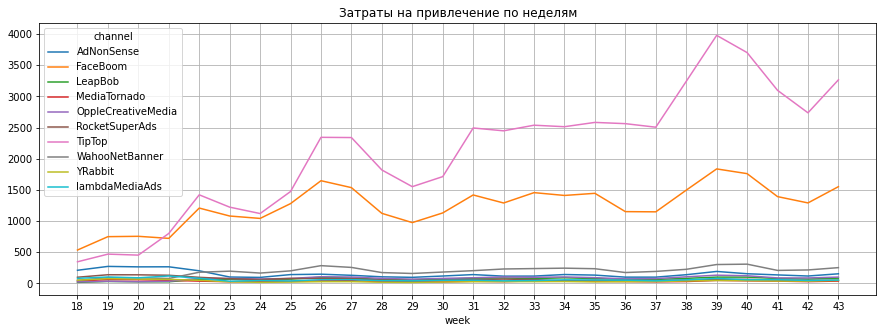

In [35]:
# динамика изменения расходов во времени по каждому источнику
plt.figure(figsize=(20, 10))
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

# расходы на рекламу по неделям
costs_channels_weeks = costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
costs_channels_weeks.T.plot(grid=True,  # добавляем сетку
    xticks=list(costs_channels_weeks.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),
)
plt.title('Затраты на привлечение по неделям') 
plt.show()


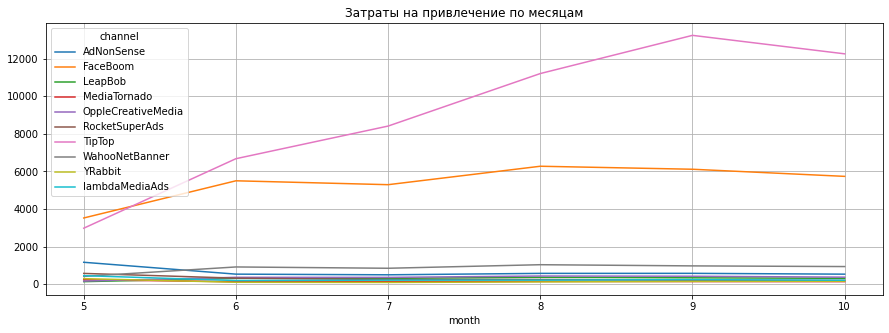

In [36]:
# расходы на рекламу по месяцам
costs_channels_month = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')
costs_channels_month.T.plot(grid=True,  # добавляем сетку
    xticks=list(costs_channels_month.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),)  
plt.title('Затраты на привлечение по месяцам') 
plt.show()

Затраты на TipTop в период с мая по октябрь выросли в 4 раза, на FaceBoom стали тратить на 50% больше.

Динамика затрат в остальных каналах стабильная.

In [37]:
# CAC по каналам
cac_channel = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending = False)
cac_channel

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [38]:
# Считаем стоимость привлечения одного юзера
non_organic_profiles = profiles[profiles['channel'] != 'organic']
cac_mean = round(costs_sum / non_organic_profiles['user_id'].nunique(), 2)
print(f'Средняя стоимость привлечения одного юзера: {cac_mean}')

Средняя стоимость привлечения одного юзера: 1.13


**Выводы по блоку "Маркетинг":**
1. Faceboom и TipTop - каналы с самыми высокими рекламными затратами.
1. Ежемесячные затраты на продвижение в TipTop с мая по октябрь выросли более чем в 4 раза, это самая дорогая площадка. 
1. При этом количество уников из TipTop меньше, чем у FaceBoom, а конверсия в покупку ниже, чем у FaceBoom, AdSense, Lambda.
1. Самый высокий САС также у TipTop;
1. Средний CAC - $1.13, это более чем в 2 раза меньше, чем CAC Tiptop и примерно равно CAC FaceBoom.

## Оценка окупаемости рекламы

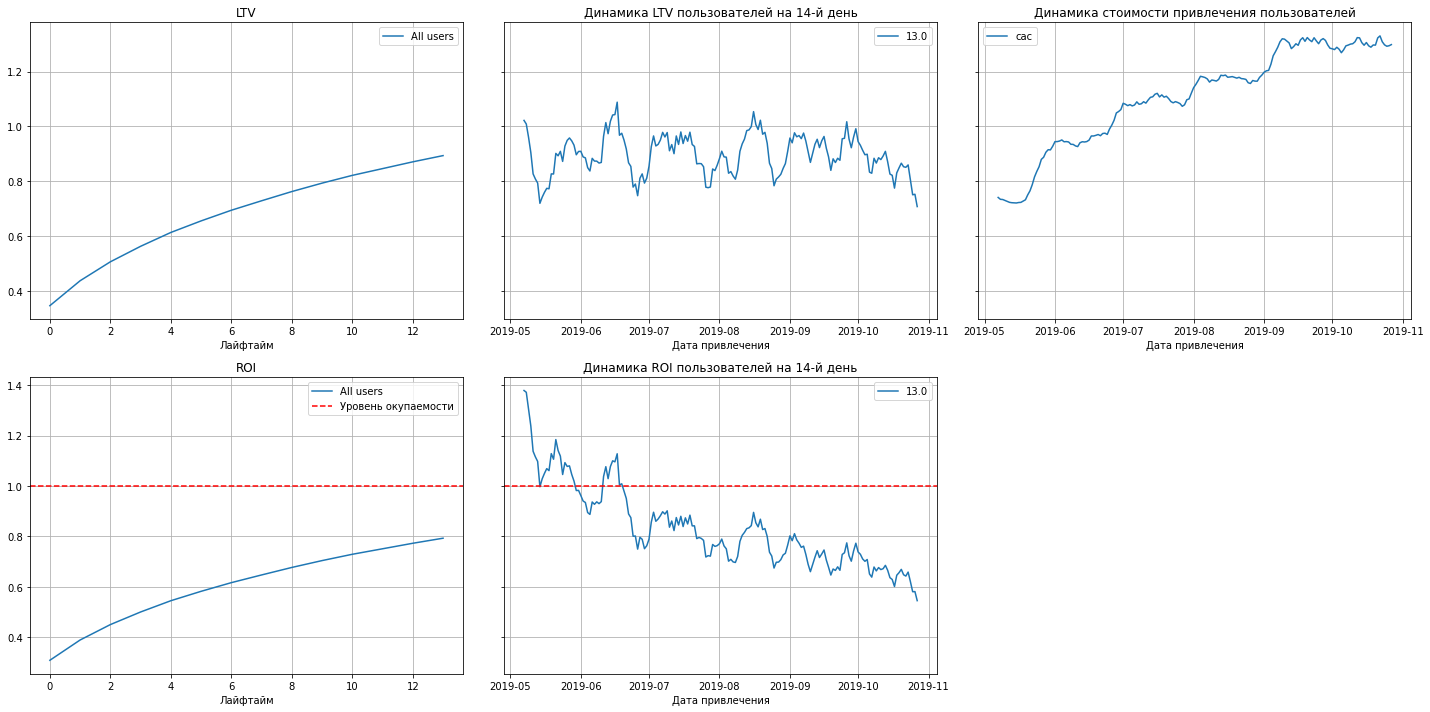

In [39]:
# Графики LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**По графикам можно сделать такие выводы:**

Реклама не окупается. ROI в конце второй недели — 0.8.

CAC в течение 6 месяцев вырос на 50%. Стоит рассмотреть затраты на рекламу.

LTV достаточно стабилен, колебания от $0.8 до $1 в течение месяца. Значит, дело не в ухудшении качества пользователей.

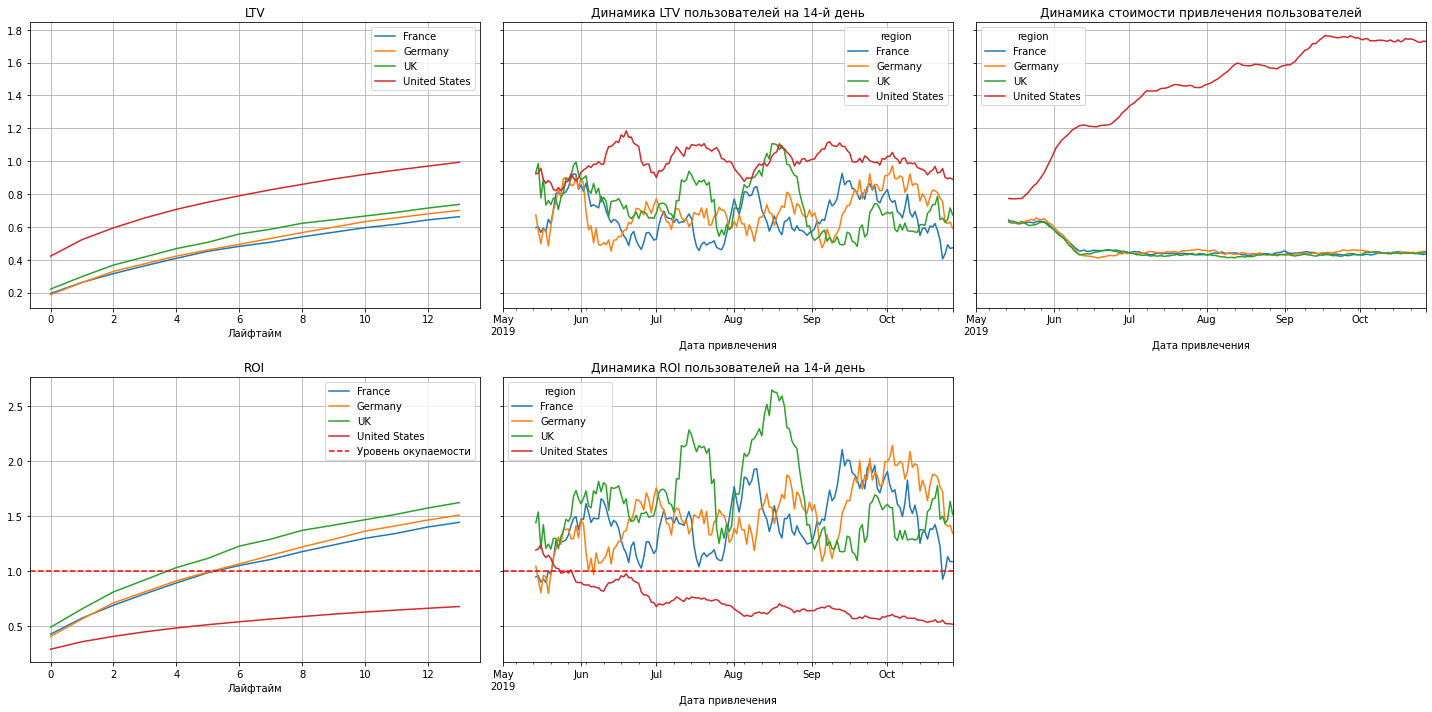

In [40]:
# Окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вот что говорят графики:**

Реклама не окупается только в США.

Стоимость привлечения юзеров из США в 3 раза выше, чем для других стран.

Лучше всех покупает США, но из-за высоких костов на рекламу ROI на 14 день не дотягивает до 1. 

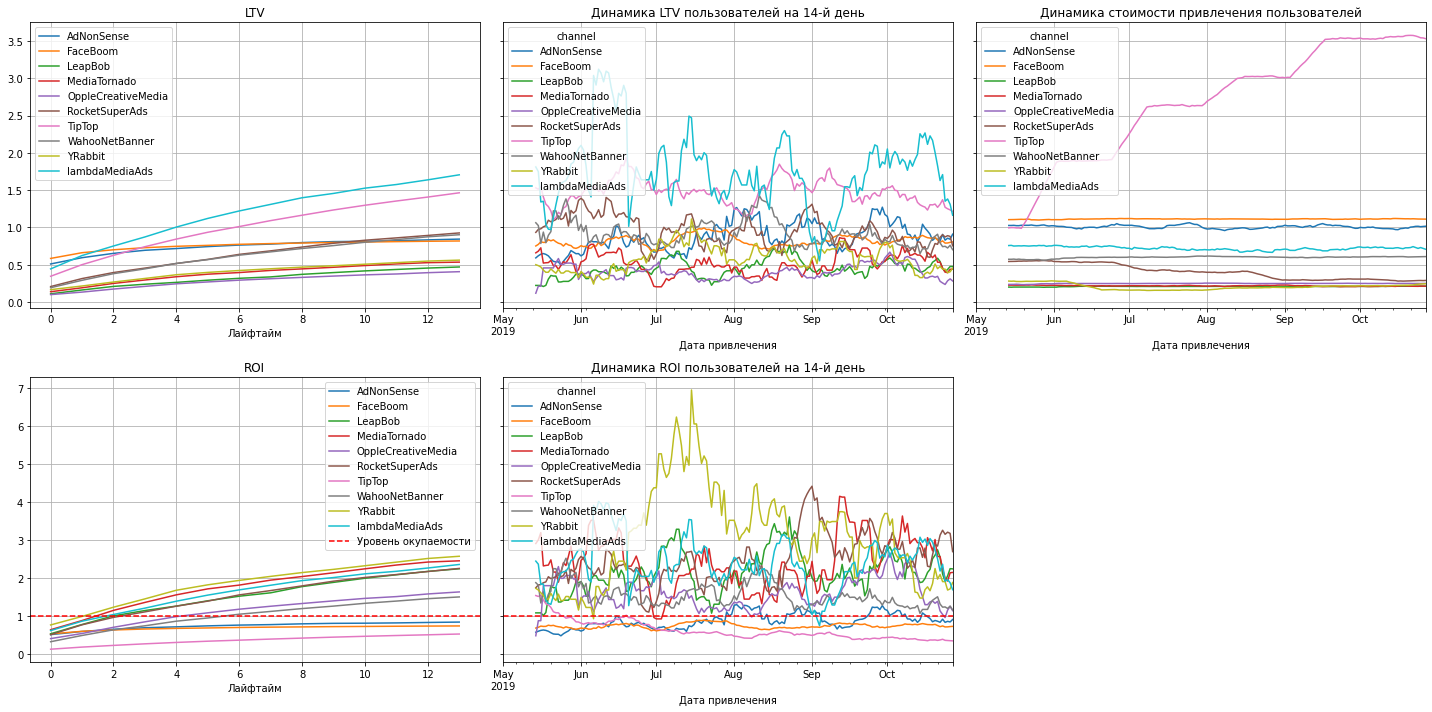

In [41]:
# Окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Выводы по каналам привлечения:**

Faceboom, Tiptop и AdNonSense убыточны.

Стоит также обратить внимание на Lambda, поскольку динамика LTV самая нестабильная. Разные когорты могут приносить от 0.5 до 3 долларов на 14 день.

Стоимость привлечения в Tiptop гораздо выше, чем в остальных каналах. Вероятно, стоит пересмотеть стратегию продвижения в Tiptop и отдать предпочтение другим площадкам.

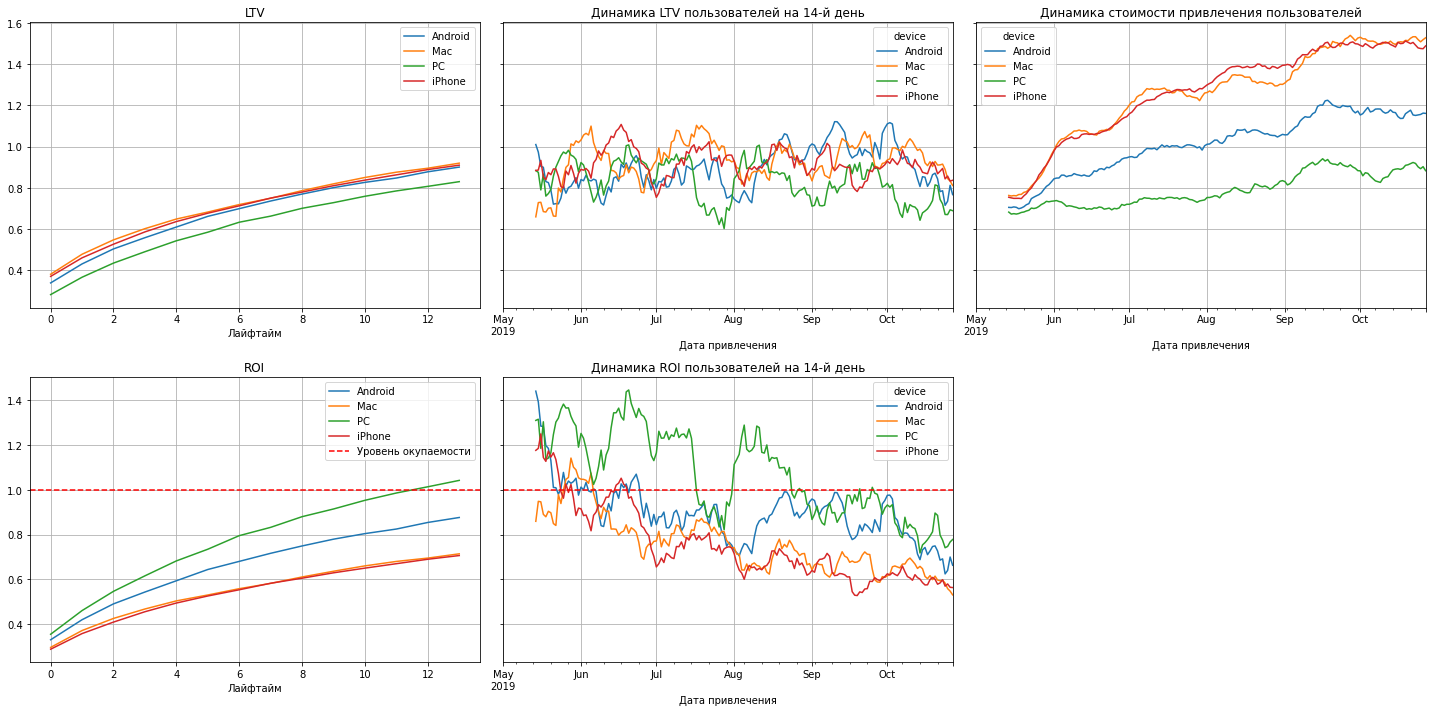

In [42]:
# Окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Выводы по устройствам:**

Пользователи PC окупаются, в то же время пользователи Android, iPhone и Mac генерируют убытки.

Привлечение юзеров на Mac и iPhone самое затратное, за период наблюдений лид стал стоить в 2 раза дороже.

Для Android стоимость лида выросла на 50%, для PC - на 25%.



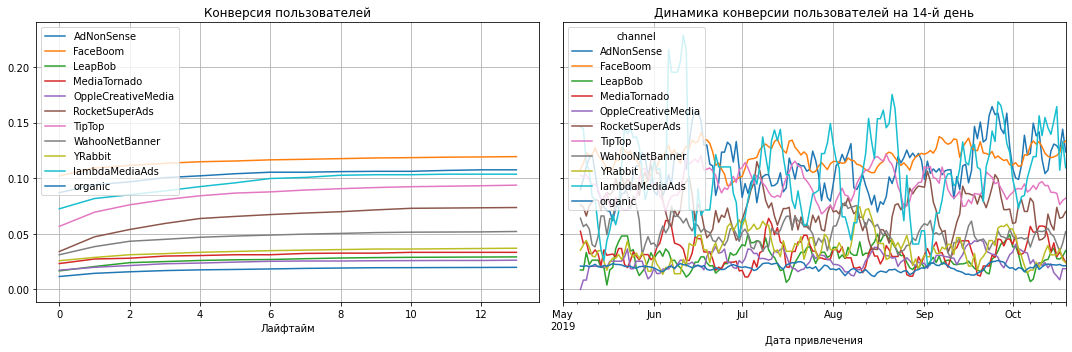

In [43]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы по конверсии в разрезе каналов:**

Пользователи, привлеченные из Faceboom конвертируются лучше всех.

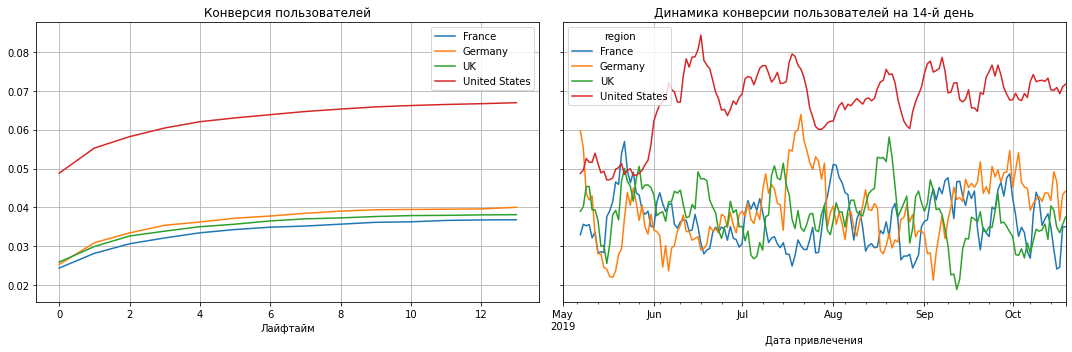

In [44]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы по конверсии в разрезе регионов:**

Пользователи из США показывают лучшую конверсию, превосходя остальные страны более чем в полтора раза.

По когортам сильного разбега нет, пользователи плюс-минус однотипные.

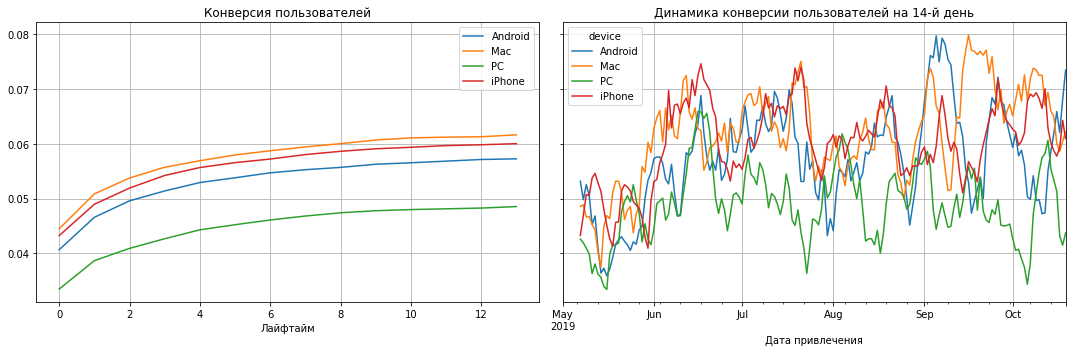

In [45]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы по конверсии в разрезе устройств:**

Лучшая конверсия у пользователй Mac и iPhone, владельцы PC демонстрируют худшую конверсию.   

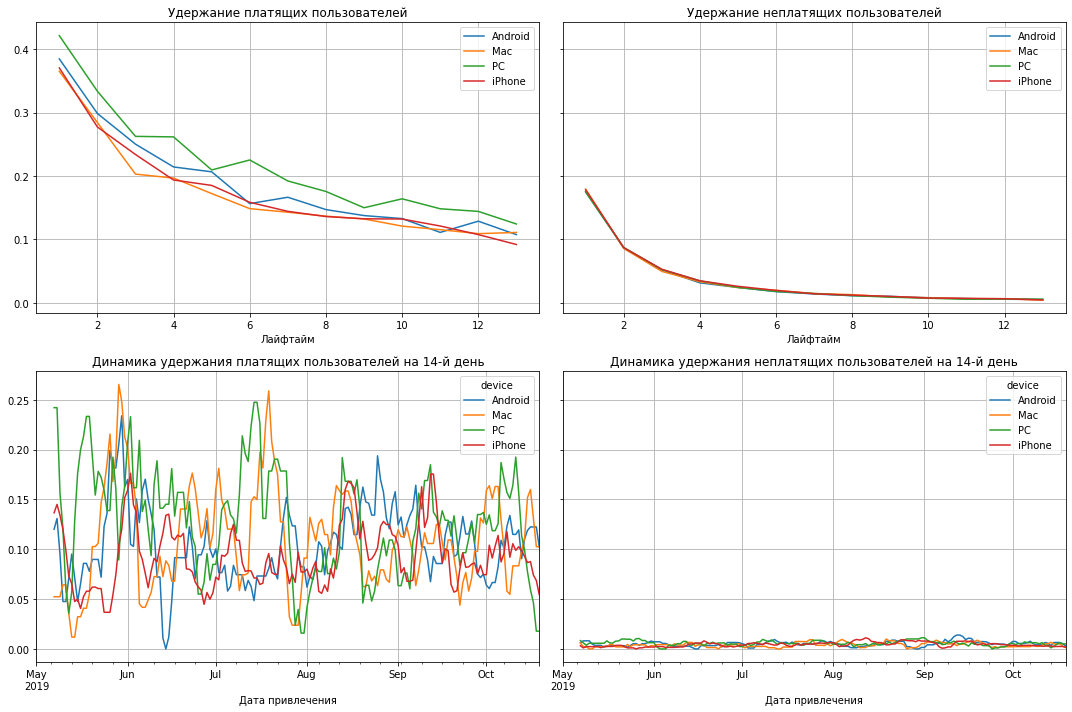

In [46]:
# смотрим удержание с разбивкой по девайсу

dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы по удержанию в разрезе девайсов:**

Удержание разных типов девайсов примерно одинаковое.

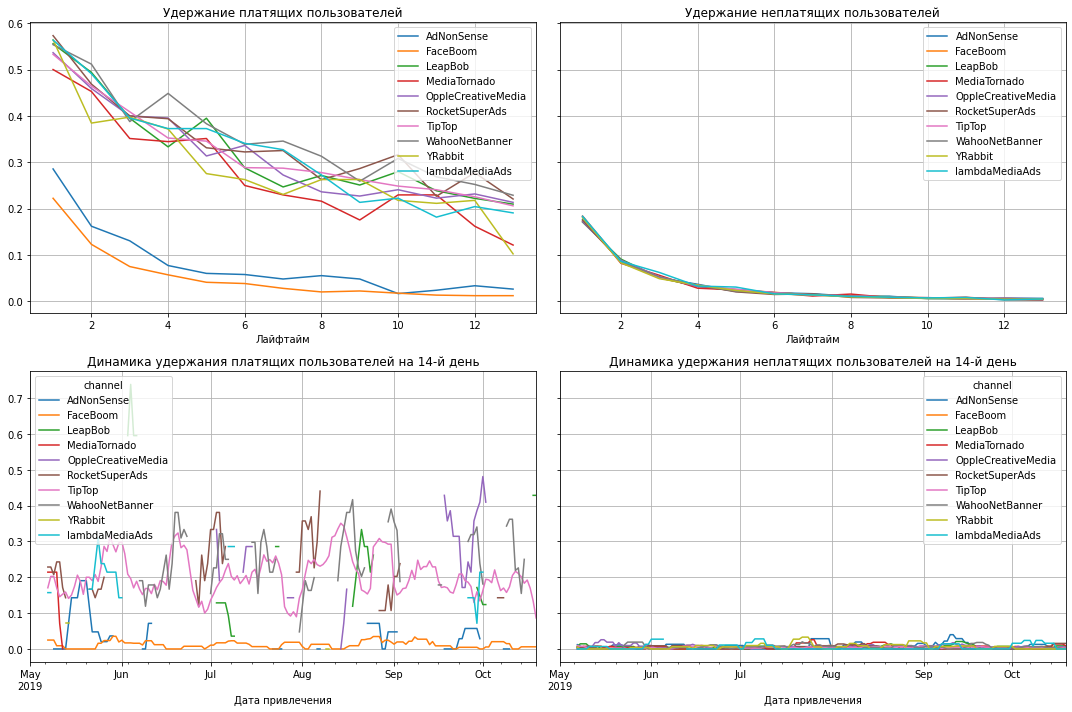

In [47]:
# смотрим удержание с разбивкой по каналу привлечения

dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы по удержанию в разрезе канала привлечния:**

Удержание пользователей, пришедших из Faceboom и AdNonSense сильно ниже, в сравнении с остальными каналами привлеченим.

Также стоит заметить, что конверсия Faceboom и AdNonSense самые высокие.

Это может означать, что аудитории этих платформ целевые, но они сталкиваются с какими-то проблемами в течение 14-дневного наблюдения.

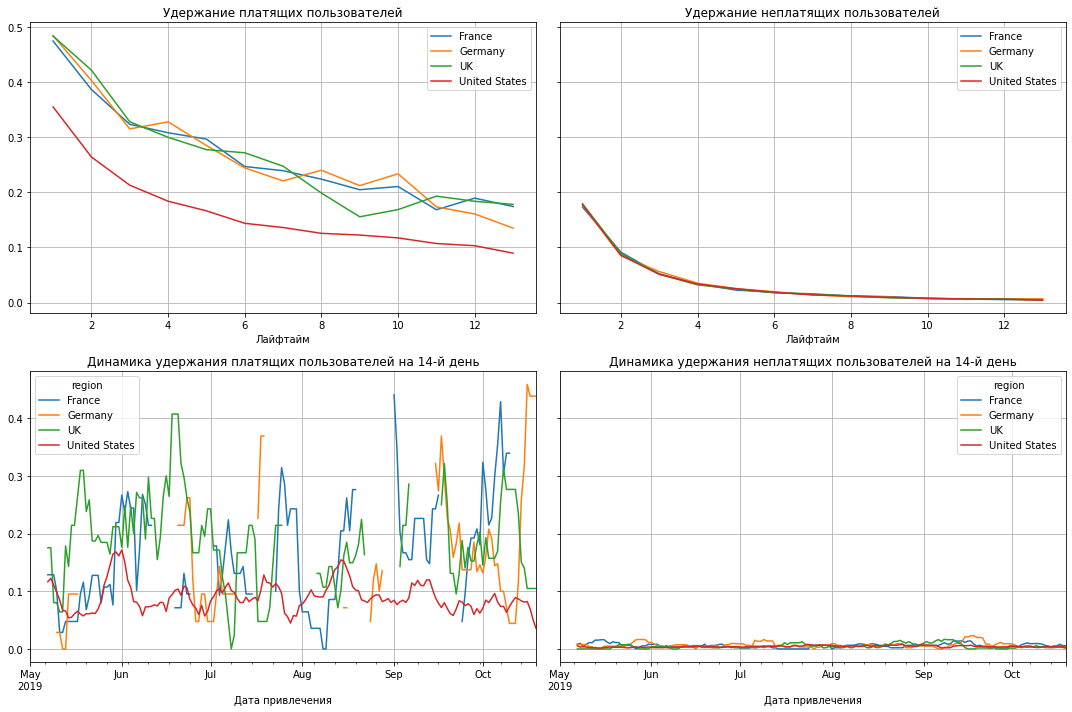

In [48]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы по удержанию в разрезе региона:**

Самое низкое удержание демонстрируют пользователи из США. Динамика стабильная на уровне 0.1.

Также стоит отметить нестабильную динамику удержания клинетов из Франции, Германии и Великобритании. В зависимости от когорты удержание варьируется от 0 до 0.4.

## Общие выводы

**Причины неэффективности рекламного продвижения:**

    1. Рекламная кампания в США неэффективна. Ввиду слишком высокой стоимости привлечения ROI не дотягивает до 1.
    
    Также стоит отметить, что пользователи из США лучше всего конвертируются в покупателей, но стабильно плохо удерживаются.
    
    2. Слишком высокие затраты на TipTop, самый высокий САС, не самая высокая конверсия. 
    
    3. Привлечение юзеров на Mac и iPhone самое дорогое. Высокий LTV, но из-за неэффективной кампании ROI меньше 1.
    
    4. Faceboom и AdNonSense - лучшая конверсия, но крайне низкое удержание пользователей.

**Рекомендации отделу маркетинга:**
    
    1. Перераспределить бюджет с TipTop на Lambda.
    
    2. Выяснить причину низкого удержания у пользователей, пришедших из Faceboom и AdNonSense.
    
    3. В случае успешного нахождения причины - увеличить маркетинговый бюджет Faceboom, RocketSuperAds и AdNonSense за 
    счет TipTop.
    
    4. Проверить таргетинги на США и пользователей Apple, вероятно есть возможность оптимизировать кампании.
    
    5. Также стоит поработать с удержанием пользователей из США.
    